In [1]:
import os
try:
    path_initialized
except NameError:
    os.chdir('..')
    path_initialized = True

import networkx as nx

from swiper2.schedule_experiments import *
from swiper2.device_manager import DeviceManager
import swiper2.plot as plotter

In [2]:
msd = MSD15To1Schedule()

In [3]:
msd_dm = DeviceManager(7, msd.schedule)

In [4]:
while not msd_dm.is_done():
    print(msd_dm.get_next_round({}))

[SyndromeRound(patch=(0, 0), round=0, instruction=Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), is_unwanted_idle=False), SyndromeRound(patch=(0, 1), round=0, instruction=Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), is_unwanted_idle=False), SyndromeRound(patch=(0, 2), round=0, instruction=Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), is_unwanted_idle=False), SyndromeRound(patch=(0, 3), round=0, instruction=Instruction(name='MERGE', patches=[(0, 0), (

In [5]:
msd_dm.get_data()

DeviceData(d=7, num_rounds=63, instructions=[Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2), (2, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='MERGE', patches=[(0, 0), (0, 1), (0, 4), (0, 5), (2, 0), (2, 1), (2, 3), (2, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='MERGE', patches=[(0, 0), (0, 2), (0, 4), (0, 6), (2, 0), (2, 2), (2, 3), (2, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[]), Instruction(name='MERGE', patches=[(0, 0), (0, 3), (0, 5), (0, 6), (2, 1), (2, 2), (2, 3), (2, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=

<Axes3D: >

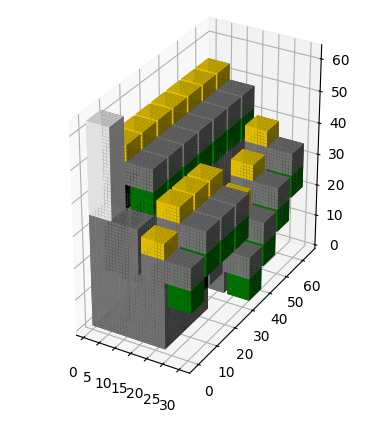

In [6]:
plotter.plot_device_schedule_trace(msd_dm.get_data())

# RegularTSchedule with a delay on the first T injection

In [7]:
regular_t = RegularTSchedule(3, 20)

In [8]:
list(enumerate(regular_t.schedule.all_instructions))

[(0,
  Instruction(name='IDLE', patches=[(0, 0)], duration=20, conditioned_on_idx=None, conditional_dependencies=[])),
 (1,
  Instruction(name='INJECT_T', patches=[(1, 0)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (2,
  Instruction(name='MERGE', patches=[(0, 0), (1, 0)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[3])),
 (3,
  Instruction(name='CONDITIONAL_S', patches=[(0, 0)], duration=<Duration.HALF_D_ROUNDS: 1>, conditioned_on_idx=2, conditional_dependencies=[])),
 (4,
  Instruction(name='DISCARD', patches=[(1, 0)], duration=0, conditioned_on_idx=None, conditional_dependencies=[])),
 (5,
  Instruction(name='IDLE', patches=[(0, 0)], duration=20, conditioned_on_idx=None, conditional_dependencies=[])),
 (6,
  Instruction(name='INJECT_T', patches=[(0, 1)], duration=<Duration.D_ROUNDS: 2>, conditioned_on_idx=None, conditional_dependencies=[])),
 (7,
  Instruction(name='MERGE', patches=[(0, 0), (0, 1)

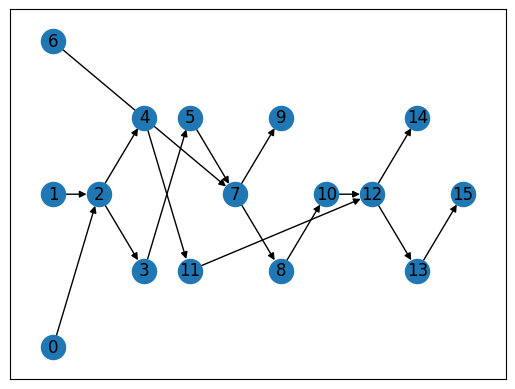

In [9]:
G = regular_t.schedule.to_dag()

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

nx.draw_networkx(G, pos=pos)

In [10]:
regular_t_dm = DeviceManager(7, regular_t.schedule)

In [11]:
for _ in range(40):
    # block first merge
    regular_t_dm.get_next_round({2})
#     print(regular_t_dm._active_patches)

while not regular_t_dm.is_done():
    regular_t_dm.get_next_round({})

<Axes3D: >

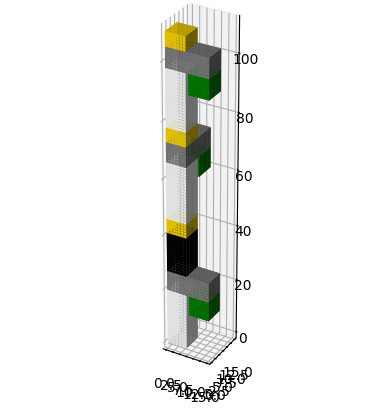

In [12]:
plotter.plot_device_schedule_trace(regular_t_dm.get_data())